In [52]:
import yfinance as yf

In [53]:
data=yf.download('ASIANPAINT.NS',start='2023-01-01',end='2023-05-30')
data=data[['Open','High','Low','Close','Volume']]

[*********************100%***********************]  1 of 1 completed


In [54]:
print(data[:5])

Price               Open          High           Low         Close  \
Ticker     ASIANPAINT.NS ASIANPAINT.NS ASIANPAINT.NS ASIANPAINT.NS   
Date                                                                 
2023-01-02   3027.594058   3027.594058   2962.000692   2987.738037   
2023-01-03   2987.492703   3000.189744   2965.922359   2969.108887   
2023-01-04   2975.727079   2990.434132   2942.930399   2957.931641   
2023-01-05   2980.188285   2987.100648   2936.900381   2945.675781   
2023-01-06   2951.215130   2964.451477   2894.347862   2920.232178   

Price             Volume  
Ticker     ASIANPAINT.NS  
Date                      
2023-01-02       1015990  
2023-01-03        860367  
2023-01-04        836382  
2023-01-05       1113920  
2023-01-06       1045526  


In [55]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(data)

In [56]:
print(scaled_data[:5])

[[0.86570065 0.79065527 0.76781216 0.78691575 0.20662942]
 [0.77307217 0.72695115 0.77697546 0.74314652 0.15085336]
 [0.74589524 0.70427323 0.72325281 0.71688556 0.14225702]
 [0.75619999 0.69652421 0.70916317 0.68809039 0.24172801]
 [0.68927609 0.6438739  0.60973561 0.62831058 0.21721527]]


In [57]:
prior_days=50
x,y=[],[]
for i in range(prior_days,len(scaled_data)):
    x.append(scaled_data[i-prior_days:i])
    y.append(scaled_data[i,3])
x,y=np.array(x),np.array(y)

In [71]:
split=int(0.70*len(x))
x_train,x_test=x[:split],x[split:]
y_train,y_test=y[:split],y[split:]

In [72]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout

In [73]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x.shape[1],x.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=20,batch_size=32)

D:\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - loss: 0.2190
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.1321 
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0764 
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0479 
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0323 
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 0.0200
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0347 
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0308 
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0282
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0243
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0215 
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0246
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0242 
Epoch 14/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0263 
Epoch 15/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0237
Epoch 16/20
2/2 ━━━━━━━━

In [78]:
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(
    np.concatenate([np.zeros((predicted_prices.shape[0], 3)),
                    predicted_prices,
                    np.zeros((predicted_prices.shape[0], 1))], axis=1)
)[:, 3]  # Inverse scale only 'Close'

real_prices = data['Close'].values[50 + split:]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


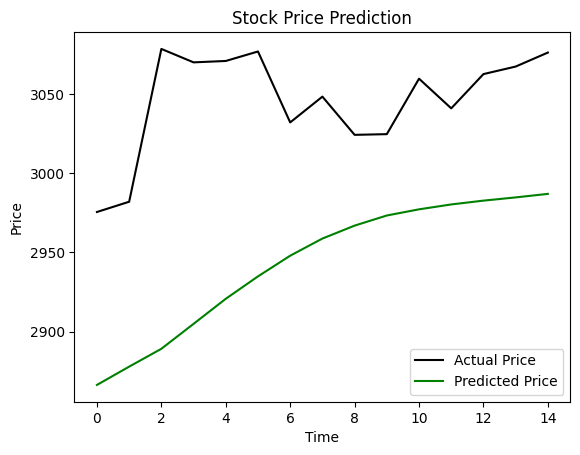

In [79]:
import matplotlib.pyplot as plt

plt.plot(real_prices, color='black', label='Actual Price')
plt.plot(predicted_prices, color='green', label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()